# Advanced Spatial Analysis
# Module 04: Intro to pandas, Part II

In [1]:
import numpy as np
import pandas as pd

# consistent randomization
np.random.seed(0)

## 1. Selecting and slicing data

In [2]:
# Operation                       Syntax           Result
#------------------------------------------------------------
# Select column                   df[col]          Series
# Select row by label             df.loc[label]    Series
# Select row by integer location  df.iloc[loc]     Series
# Slice rows                      df[5:10]         DataFrame
# Select rows by boolean vector   df[mask]         DataFrame

In [3]:
# create a pandas dataframe from the location data set
df = pd.read_csv('data/gps-coords.csv')
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


### Indexing by row/column label(s)

In [4]:
# get a column from the dataframe by its label with [] indexing - returns column as a pandas series with the dataframe's index
df['city'].head()

0    West Drayton
1        Hounslow
2        Hounslow
3        Hounslow
4        Hounslow
Name: city, dtype: object

In [5]:
# get multiple columns by their labels by passing a list of column names within the [] operator - returns a dataframe
li = ['city', 'country']
df[li].head()

,city,country
0,West Drayton,United Kingdom
1,Hounslow,United Kingdom
2,Hounslow,United Kingdom
3,Hounslow,United Kingdom
4,Hounslow,United Kingdom


In [6]:
# get a single value using the [] operator for a column label then a row label
df['city'][0]

'West Drayton'

### Indexing using .loc

In [7]:
# use .loc to select by row label - returns the row as a series whose index is the dataframe column labels
df.loc[0]

lat                 51.4813
lon               -0.451011
date       05/14/2014 09:07
city           West Drayton
country      United Kingdom
Name: 0, dtype: object

In [8]:
# use .loc to select by row label and column label
df.loc[0, 'country']

'United Kingdom'

In [9]:
# 0:3 is a slice of rows with label 0 to label 3
# ['city', 'date'] is a list of column labels
df.loc[1:3, ['city', 'date']]

,city,date
1,Hounslow,05/14/2014 09:22
2,Hounslow,05/14/2014 10:51
3,Hounslow,05/14/2014 11:24


In [10]:
# slice by rows and columns
df.loc[1:3, 'date':'country']

,date,city,country
1,05/14/2014 09:22,Hounslow,United Kingdom
2,05/14/2014 10:51,Hounslow,United Kingdom
3,05/14/2014 11:24,Hounslow,United Kingdom


In [11]:
# you can set values with .loc as well
print(df.loc[0, 'city'])
df.loc[0, 'city'] = 'London'
print(df.loc[0, 'city'])

West Drayton
London


In [12]:
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,London,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


### Indexing using .iloc

In [13]:
# use .iloc for integer-position based indexing as [row, column]
# get the value from the row in position 3 and the column in position 2 (zero-indexed)
df.iloc[3, 2]

'05/14/2014 11:24'

In [14]:
# you can use .iloc with slices too
# slice rows from position 112 to 115 and columns from position 2 to 4
# iloc is not inclusive, so for example "from 2 to 4" will return positions 2 and 3 (but not 4)
df.iloc[112:115, 2:4]

,date,city
112,05/16/2014 07:03,Lisbon
113,05/16/2014 07:33,Lisbon
114,05/16/2014 08:03,Lisbon


In [15]:
# you can use iloc to sample every nth row from a data set
n = 300
df.iloc[range(0, len(df), n)]

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,London,United Kingdom
300,41.377091,2.151175,05/20/2014 03:18,Barcelona,Spain
600,50.052338,19.946220,05/31/2014 21:10,Krakow,Poland
900,48.561181,9.059672,06/09/2014 15:12,Tübingen,Germany
1200,41.378301,2.187443,06/17/2014 16:37,Barcelona,Spain
1500,42.208201,20.735993,06/30/2014 08:27,Prizren,Kosovo


In [16]:
# it's easier to tell the difference between .loc and .iloc if the index labels aren't the same as their positions
df.index = [label**2 for label in df.index]
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,London,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
4,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
9,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
16,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


In [17]:
# this returns the rows with labels between 4 and 9 (.loc is inclusive)
df.loc[4:9]

,lat,lon,date,city,country
4,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
9,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom


In [18]:
# this returns rows with labels in positions 4 through 8 (not through 9, because .iloc is not inclusive)
df.iloc[4:9]

,lat,lon,date,city,country
16,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom
25,51.480146,-0.441103,05/14/2014 12:23,Hounslow,United Kingdom
36,51.479669,-0.441024,05/14/2014 12:38,Hounslow,United Kingdom
49,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
64,38.774422,-9.129195,05/14/2014 15:25,Lisbon,Portugal


In [19]:
# now it's your turn
# select the even-numbered rows (by integer position) and all columns that begin with "c"


## 2. Grouping and summarizing

In [20]:
groups = df.groupby('city')

In [21]:
# calculate the average latitude observed per city
groups['lat'].mean().head()

city
Algueirão-Mem Martins    38.797558
Alpirsbach               48.343188
Amadora                  38.761602
Ansbach                  49.260220
Athens                   37.969904
Name: lat, dtype: float64

In [22]:
# calculate the average latitude observed in the 10 cities with the most observations
most_observed = groups.size().sort_values(ascending=False).index
groups['lat'].mean().reindex(most_observed).head(10)

city
Barcelona    41.382399
Lisbon       38.714537
Tübingen     48.522865
Prague       50.077558
Istanbul     41.028454
Athens       37.969904
Krakow       50.061272
Porto        41.145102
Freiburg     47.996304
Kotor        42.423492
Name: lat, dtype: float64

In [23]:
# now it's your turn
# calculate the single westernmost coordinate in each country


## 3. Select rows by value

We introduced this briefly in the previous module, but now we'll explore this topic in more depth, including using logical operators.

In [24]:
# load a reduced set of gps data
df = pd.read_csv('data/gps-coords-reduced.csv')
df.tail()

,lat,lon,date,city,country
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [25]:
# create a Series of true/false, indicating if each row in the column is equal to some value
(df['city']=='Munich').head()

0    False
1    False
2    False
3    False
4    False
Name: city, dtype: bool

In [26]:
# now, select only those rows in the df that match that condition
df[df['city']=='Munich']

,lat,lon,date,city,country
177,48.35711,11.791346,07/09/2014 13:20,Munich,Germany


In [27]:
# pandas logical operators are: | for or, & for and, ~ for not
# these must be grouped by using parentheses
# which observations are in spain but not in barcelona?
not_bcn = df[(df['country']=='Spain') & ~(df['city']=='Barcelona')]
not_bcn

,lat,lon,date,city,country
24,41.303911,2.105931,05/18/2014 22:35,El Prat de Llobregat,Spain
25,41.289946,2.064590,05/18/2014 23:04,Viladecans,Spain
126,41.306752,2.097624,06/12/2014 17:19,El Prat de Llobregat,Spain
127,41.304333,2.072728,06/12/2014 17:49,El Prat de Llobregat,Spain
131,41.358460,2.128701,06/13/2014 11:35,Hospitalet de Llobregat,Spain
138,41.294761,2.059722,06/20/2014 22:15,Viladecans,Spain


In [28]:
# get the unique city names
not_bcn['city'].unique().tolist()

['El Prat de Llobregat', 'Viladecans', 'Hospitalet de Llobregat']

In [29]:
# select rows where either the city is munich, or the country is serbia
df[(df['city']=='Munich') | (df['country']=='Serbia')]

,lat,lon,date,city,country
139,44.821164,20.289821,06/21/2014 01:59,Belgrade,Serbia
140,44.820414,20.463465,06/21/2014 18:44,Belgrade,Serbia
141,44.761583,19.577904,06/22/2014 07:58,Slepčević,Serbia
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [30]:
# how many observations are west of the prime meridian?
len(df[df['lon'] < 0])

24

In [31]:
# get all rows that contain a city that starts with the letter G
row_mask = df['city'].str.startswith('G')
df[row_mask]

,lat,lon,date,city,country
62,50.273632,18.729429,06/02/2014 06:39,Gliwice,Poland
114,48.282940,8.199630,06/10/2014 13:33,Gutach,Germany
115,48.389029,8.021342,06/10/2014 13:48,Gengenbach,Germany
152,40.187825,20.079303,07/04/2014 17:42,Gjirokastër,Albania


In [32]:
# select all rows with certain city names by using .isin([list])
row_mask = df['city'].isin(['Munich', 'Berat', 'Maia', 'Sarajevo'])
df[row_mask]

,lat,lon,date,city,country
23,41.237205,-8.672173,05/18/2014 19:55,Maia,Portugal
142,43.859459,18.425962,06/22/2014 21:12,Sarajevo,Bosnia and Herzegovina
143,43.858562,18.397478,06/23/2014 14:12,Sarajevo,Bosnia and Herzegovina
151,40.702184,19.946288,07/04/2014 08:14,Berat,Albania
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [33]:
# now it's your turn
# select all the rows that are either in Portugal or are east of the prime meridian


## 4. Working with date-time values

In [34]:
# load the location data set, indexed by the date field
# and, parse the dates so they're no longer strings but now rather Python datetime objects
# this lets us do date and time based operations on the data set
dt = pd.read_csv('data/gps-coords.csv', index_col='date', parse_dates=True)
dt.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [35]:
len(dt)

1759

In [36]:
# 1759 rows - but is the timestamp index unique?
dt.index.is_unique

False

In [37]:
# drop duplicates where values in all columns match
dt = dt.drop_duplicates(inplace=False)
len(dt)

1750

In [38]:
# now is it unique?
dt.index.is_unique

False

In [39]:
# now drop any rows that duplicate another's index label
dt = dt[~dt.index.duplicated(keep='first')]
len(dt)

1749

In [40]:
# now is it unique?
dt.index.is_unique

True

In [41]:
# the .weekday attribute determines which day of the week a date is
# 0 is monday and 6 is sunday, Tue-Sat are 1-5
# what day of the week is each datetime in our dataframe's index?
dt.index.weekday[:100]

Int64Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
            2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4],
           dtype='int64', name='date')

In [42]:
# use bitwise OR to create a boolean vector of which rows are on a weekend
weekend_mask = (dt.index.weekday==5) | (dt.index.weekday==6)
weekend_mask

array([False, False, False, ..., False, False, False])

In [43]:
weekends = dt[weekend_mask]
weekdays = dt[~weekend_mask]

In [44]:
hourly_share = pd.DataFrame()

# calculate what share of the weekday observations each hour has
weekday_hourly = weekdays.groupby(weekdays.index.hour).size()
hourly_share['weekday'] = weekday_hourly / weekday_hourly.sum()

# calculate what share of the weekend observations each hour has
weekend_hourly = weekends.groupby(weekends.index.hour).size()
hourly_share['weekend'] = weekend_hourly / weekend_hourly.sum()

# format the x-axis ticks like 0:00 times and plot the data
hourly_share.index = [s + ':00' for s in hourly_share.index.astype(str)]
hourly_share.head()

,weekday,weekend
0:00,0.019370,0.029412
1:00,0.016142,0.035294
2:00,0.017756,0.029412
3:00,0.020178,0.033333
4:00,0.013721,0.011765


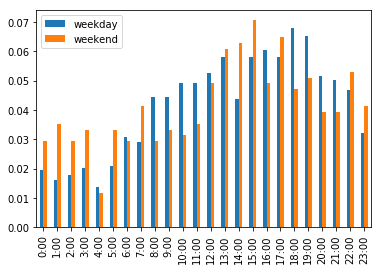

In [45]:
# visualize it - we'll learn all about this in the next module
%matplotlib inline
ax = hourly_share.plot(kind='bar')

In [46]:
# now it's your turn
# select all the rows from the dt DataFrame that occurred between 06:00 AM and 12:00 PM


## 5. Merge and Concatenate

In [47]:
df1 = pd.read_csv('data/tracts_pop_age.csv', dtype={'GEOID':str}).set_index('GEOID')
df2 = pd.read_csv('data/tracts_white_income.csv', dtype={'GEOID':str})

In [48]:
print(df1.shape)
df1.columns

(12328, 3)


Index(['land_area', 'total_pop', 'median_age'], dtype='object')

In [49]:
print(df2.shape)
df2.columns

(12328, 4)


Index(['GEOID', 'place_name', 'prop_white', 'med_income_k'], dtype='object')

In [50]:
df1 = df1.sample(1000)
print(df1.shape)
df1.head()

(1000, 3)


,land_area,total_pop,median_age
GEOID,,,
04013103604,3093955,3800.0,43.6
48113018130,2994155,3865.0,30.2
36061013700,225671,6977.0,39.0
12095014609,2669496,5957.0,27.6
47037019006,3037419,5447.0,32.6


In [51]:
df2 = df2.sample(1000)
print(df2.shape)
df2.head()

(1000, 4)


,GEOID,place_name,prop_white,med_income_k
6721,36047051400,"New York, NY",0.089,45.712
2778,12031001300,"Jacksonville, FL",0.113,20.212
10140,47157021311,"Memphis, TN",0.855,103.717
7868,36081103900,"New York, NY",0.604,82.075
5204,26163533000,"Detroit, MI",0.029,23.542


In [52]:
# merge the dataframes together
df = pd.merge(left=df1, right=df2, how='inner', left_index=True, right_on='GEOID')
df = df.set_index('GEOID')
print(df.shape)
df.head()

(96, 6)


,land_area,total_pop,median_age,place_name,prop_white,med_income_k
GEOID,,,,,,
04013103604,3093955,3800.0,43.6,"Phoenix, AZ",0.655,39.989
51810046015,6134796,5610.0,35.3,"Virginia Beach, VA",0.576,69.470
06075023102,500767,4870.0,29.3,"San Francisco, CA",0.056,35.390
25025080100,1026666,2864.0,34.5,"Boston, MA",0.199,27.318
42101024400,421189,2715.0,45.8,"Philadelphia, PA",0.052,31.339


What happens if you change the "how" argument to 'left' or 'right' or 'outer'? How do you explain this behavior?

In [53]:
# create two subset dataframes
df_la = df[df['place_name']=='Los Angeles, CA']
df_sf = df[df['place_name']=='San Francisco, CA']

In [54]:
# concate the subsets back together
df_ca = pd.concat([df_la, df_sf], axis=0)
df_ca

,land_area,total_pop,median_age,place_name,prop_white,med_income_k
GEOID,,,,,,
06037183104,662237,2145.0,40.1,"Los Angeles, CA",0.249,66.842
06037206032,959084,5168.0,29.3,"Los Angeles, CA",0.046,25.260
06037297400,2092349,3711.0,55.5,"Los Angeles, CA",0.687,103.113
06037234700,742057,3680.0,38.9,"Los Angeles, CA",0.004,32.799
06037201301,872773,3146.0,38.6,"Los Angeles, CA",0.073,41.304
06037222100,478935,3974.0,31.9,"Los Angeles, CA",0.028,35.859
06037121801,485688,3463.0,31.1,"Los Angeles, CA",0.170,34.683
06037203100,657446,4450.0,25.9,"Los Angeles, CA",0.011,21.261
06037189400,1446821,3523.0,39.6,"Los Angeles, CA",0.780,97.591


In [55]:
# now it's your turn
# create two subsets of the dataframe: one containing tracts in Arizona, and one containing tracts in Florida
# then concatenate them back together


## 6. Map and Apply

These methods are useful for mapping/applying a function across elements, rows, and columns of a pandas DataFrame or Series. But they have some important and often confusing differences.

1. `.map()` applies a function element-wise on a Series
2. `.apply()` works on a row or column basis on a DataFrame (specify the axis!), or element-wise on a Series
3. `.applymap()` works element-wise on an entire DataFrame

Let's see what that means in practice with some examples.

In [56]:
dt = pd.read_csv('data/gps-coords-reduced.csv')
dt.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.711050,-9.139739,05/14/2014 16:40,Lisbon,Portugal
3,38.715637,-9.120558,05/14/2014 18:25,Lisbon,Portugal
4,38.711977,-9.141788,05/14/2014 19:26,Lisbon,Portugal


In [57]:
# parse date string to a datetime object
dt['date'] = pd.to_datetime(dt['date'])
dt.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,2014-05-14 09:07:00,West Drayton,United Kingdom
1,38.781775,-9.137544,2014-05-14 15:11:00,Lisbon,Portugal
2,38.711050,-9.139739,2014-05-14 16:40:00,Lisbon,Portugal
3,38.715637,-9.120558,2014-05-14 18:25:00,Lisbon,Portugal
4,38.711977,-9.141788,2014-05-14 19:26:00,Lisbon,Portugal


In [58]:
# you can iterate through a DataFrame using the .iterrows() method
for label, row in dt.loc[50:60].iterrows():
    if row['date'].month > 5:
        print('summer')
    else:
        print('spring')

spring
spring
spring
spring
spring
spring
summer
summer
summer
summer
summer


#### alternatively, .map() applies a function element-wise on a Series

In [59]:
# create a function
def get_season(date):
    if date.month > 5:
        return 'summer'
    else:
        return 'spring'
    
# then map it to the series
dt['season'] = dt['date'].map(get_season)

In [60]:
dt.head()

,lat,lon,date,city,country,season
0,51.481292,-0.451011,2014-05-14 09:07:00,West Drayton,United Kingdom,spring
1,38.781775,-9.137544,2014-05-14 15:11:00,Lisbon,Portugal,spring
2,38.711050,-9.139739,2014-05-14 16:40:00,Lisbon,Portugal,spring
3,38.715637,-9.120558,2014-05-14 18:25:00,Lisbon,Portugal,spring
4,38.711977,-9.141788,2014-05-14 19:26:00,Lisbon,Portugal,spring


In [61]:
# or do the same thing all in one line, using a lambda function as .map()'s argument
# you commonly see this with pandas
dt['season'] = dt['date'].map(lambda date: 'summer' if date.month > 5 else 'spring')

A [lambda function](http://www.python-course.eu/lambda.php) is a simple, one-off, anonymous function. You can't call it again later because it doesn't have a name. It just lets you repeatedly perform some operation across a series of values (in our case, a column in our dataframe) using a minimal amount of code. Also notice that the if-else statement is all on one line: this is called a [ternary operator](http://pythoncentral.io/one-line-if-statement-in-python-ternary-conditional-operator/) or an inline-if.

In [62]:
# now it's your turn
# write a function to determine if the datetime is AM or PM, then map it to the date column
# next, rewrite it as a lambda function


#### .apply() is like .map(), but it works on a row or column basis on an entire DataFrame (specify the axis)

In [63]:
# create a new DataFrame with fake year data
df = pd.DataFrame({'start_year':[2001, 2002, 2005, 2005, 2006], 
                   'mid_year':[2002, 2010, 2008, 2006, 2014],
                   'end_year':[2012, 2018, 2018, 2016, 2017]})
df

,start_year,mid_year,end_year
0,2001,2002,2012
1,2002,2010,2018
2,2005,2008,2018
3,2005,2006,2016
4,2006,2014,2017


In [64]:
# function to calculate the difference between the min and max values in a series
def get_difference(vector):
    difference = vector.max() - vector.min()
    return difference

df.apply(get_difference, axis=0)

start_year     5
mid_year      12
end_year       6
dtype: int64

In [65]:
# same thing again, using a lambda function
df.apply(lambda x: x.max() - x.min(), axis=0)

start_year     5
mid_year      12
end_year       6
dtype: int64

In [66]:
# find the difference between the min and max values in each row (ie, column-wise) and save to a new column
df['difference'] = df.apply(get_difference, axis=1)
df

,start_year,mid_year,end_year,difference
0,2001,2002,2012,11
1,2002,2010,2018,16
2,2005,2008,2018,13
3,2005,2006,2016,11
4,2006,2014,2017,11


#### .applymap() works element-wise on an entire DataFrame
This is like doing a .map() to each column in the DataFrame

In [67]:
# divide every value in the dataframe by two
df.applymap(lambda x: x / 2)

,start_year,mid_year,end_year,difference
0,1000.5,1001.0,1006.0,5.5
1,1001.0,1005.0,1009.0,8.0
2,1002.5,1004.0,1009.0,6.5
3,1002.5,1003.0,1008.0,5.5
4,1003.0,1007.0,1008.5,5.5


## 7. Hierarchical indexing

In [68]:
df = pd.read_csv('data/tracts_white_income.csv', dtype={'GEOID':str})
df.head()

,GEOID,place_name,prop_white,med_income_k
0,01073000100,"Birmingham, AL",0.171,24.359
1,01073000300,"Birmingham, AL",0.046,20.425
2,01073000400,"Birmingham, AL",0.079,21.759
3,01073000500,"Birmingham, AL",0.050,21.430
4,01073000700,"Birmingham, AL",0.000,15.833


In [69]:
# replace the place_name column with discrete city and state columns
df['city'] = df['place_name'].map(lambda x: x.split(', ')[0])
df['state'] = df['place_name'].map(lambda x: x.split(', ')[1])
df = df.drop(columns=['place_name'])
df.head()

,GEOID,prop_white,med_income_k,city,state
0,01073000100,0.171,24.359,Birmingham,AL
1,01073000300,0.046,20.425,Birmingham,AL
2,01073000400,0.079,21.759,Birmingham,AL
3,01073000500,0.050,21.430,Birmingham,AL
4,01073000700,0.000,15.833,Birmingham,AL


In [70]:
# create a 3-level hierarchical index and sort it for fast look-up performance
df = df.set_index(['state', 'city', 'GEOID']).sort_index()
df.head()

prop_white  med_income_k
state city       GEOID                                
AL    Birmingham 01073000100       0.171        24.359
                 01073000300       0.046        20.425
                 01073000400       0.079        21.759
                 01073000500       0.050        21.430
                 01073000700       0.000        15.833

In [71]:
# is the multiindex unique?
df.index.is_unique

True

In [72]:
# index the top level with a single value
df.loc['CA'].mean()

prop_white       0.341477
med_income_k    64.531556
dtype: float64

In [73]:
# index the top two levels with a tuple
df.loc[('CA', 'Los Angeles')].mean()

prop_white       0.292806
med_income_k    55.274059
dtype: float64

In [74]:
# index the top level, group by the 2nd level, calculate a summary stat
df.loc['CA'].groupby(level=0).mean()

,prop_white,med_income_k
city,,
Los Angeles,0.292806,55.274059
Riverside,0.316250,59.201276
Sacramento,0.377065,50.954732
San Diego,0.463357,72.305075
San Francisco,0.429631,81.654277
San Jose,0.303191,89.322178


## In-Class Exercise

See the module's readme page for instructions. Complete this exercise in class.